# Earth Pressure Coefficients

In [1]:
# Library Dependencies
%load_ext autoreload
%autoreload 2
import pyec7
import numpy as np
import matplotlib.pyplot as plt

## Active

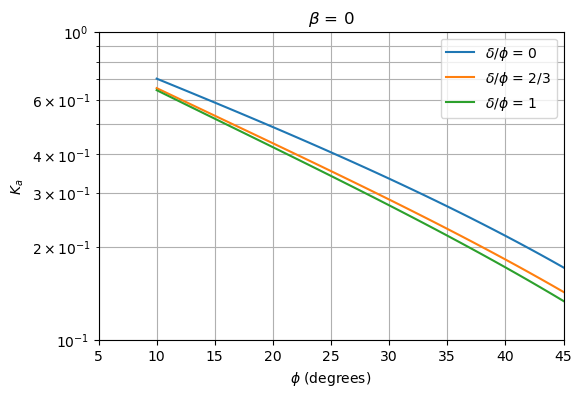

In [2]:
# Horizontal Surface

# Inputs
friction = np.arange(10, 46, 1)
delta_ratio = np.array([0, 2/3, 1])

# Computations
Ka = [[ pyec7.earth_pressures(friction=phi, cohesion=0, delta=d_phi*phi, active=True)[3]
    for d_phi in delta_ratio] for phi in friction]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.semilogy(friction, Ka)
ax.set_xlabel(r'$\phi$ (degrees)')
ax.set_ylabel(r'$K_a$')
ax.set_title(r'$\beta$ = 0')
ax.legend(['$\delta/\phi$ = 0', '$\delta/\phi$ = 2/3', '$\delta/\phi$ = 1'])
ax.set_xlim(5, 45)
ax.set_ylim(0.1,1)
ax.grid(which='both')

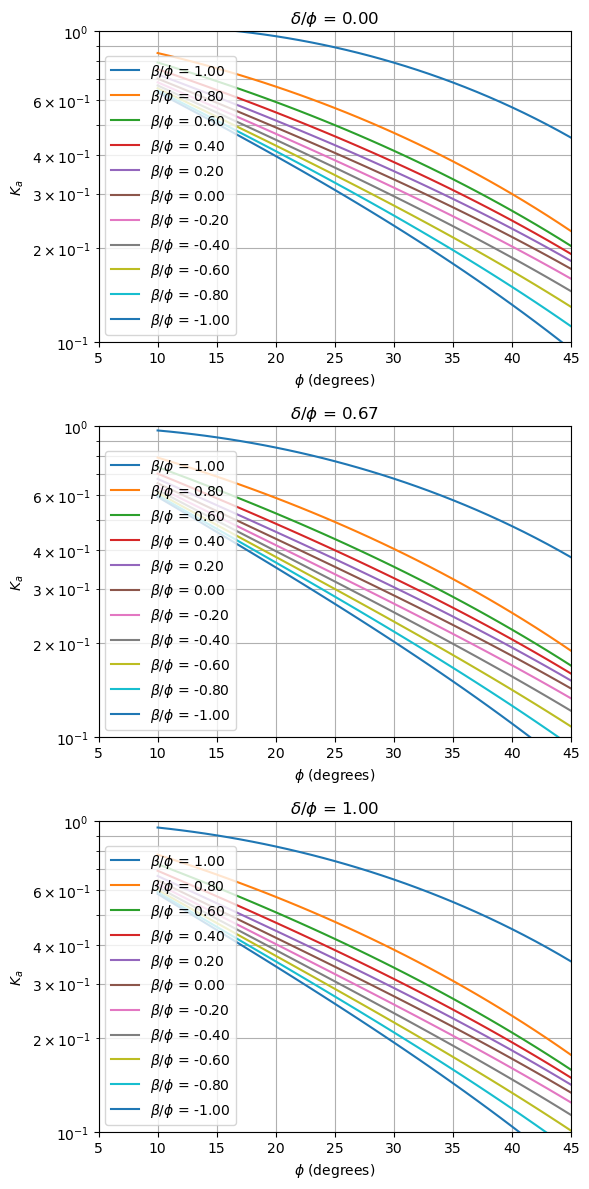

In [3]:
# Inclined Surface

# Inputs
friction = np.arange(10, 46, 1)
delta_ratio = np.array([0, 2/3, 1])
beta_ratio = np.arange(1, -1.2, -0.2)

# Computations
Ka = [[[ pyec7.earth_pressures(friction=phi, cohesion=0, delta=d_phi*phi, beta=b_phi*phi, active=True)[3] * np.cos(np.deg2rad(b_phi*phi))
    for b_phi in beta_ratio] for phi in friction] for d_phi in delta_ratio] 

# Plotting
fig,axes = plt.subplots(3,1,figsize=(6, 12))
for i in range(3):
    axes[i].semilogy(friction, Ka[i])
    axes[i].set_xlabel(r'$\phi$ (degrees)')
    axes[i].set_ylabel(r'$K_a$')
    axes[i].set_title(r'$\delta/\phi$ = '+'{:.2f}'.format(delta_ratio[i]))
    axes[i].legend([r'$\beta/\phi$ = ' + '{:.2f}'.format(b_phi) for b_phi in beta_ratio])
    axes[i].set_xlim(5, 45)
    axes[i].set_ylim(0.1,1)
    axes[i].grid(which='both')
fig.tight_layout()

## Passive

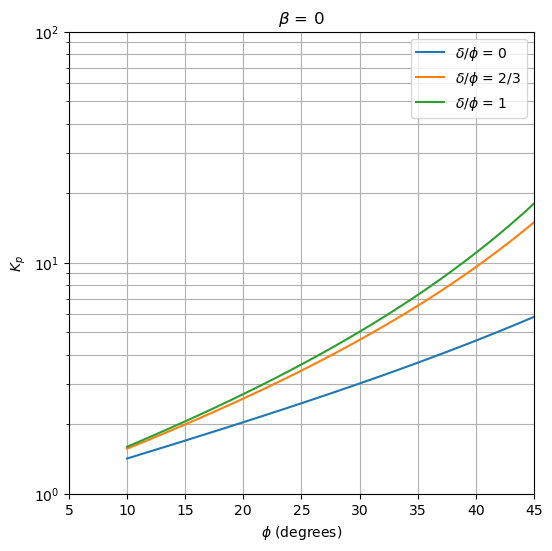

In [4]:
# Horizontal Surface

# Inputs
friction = np.arange(10, 46, 1)
delta_ratio = np.array([0, 2/3, 1])

# Computations
Kp = [[ pyec7.earth_pressures(friction=phi, cohesion=0, delta=d_phi*phi, active=False)[3]
    for d_phi in delta_ratio] for phi in friction]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.semilogy(friction, Kp)
ax.set_xlabel(r'$\phi$ (degrees)')
ax.set_ylabel(r'$K_p$')
ax.set_title(r'$\beta$ = 0')
ax.legend(['$\delta/\phi$ = 0', '$\delta/\phi$ = 2/3', '$\delta/\phi$ = 1'])
ax.set_xlim(5, 45)
ax.set_ylim(1,100)
ax.grid(which='both')

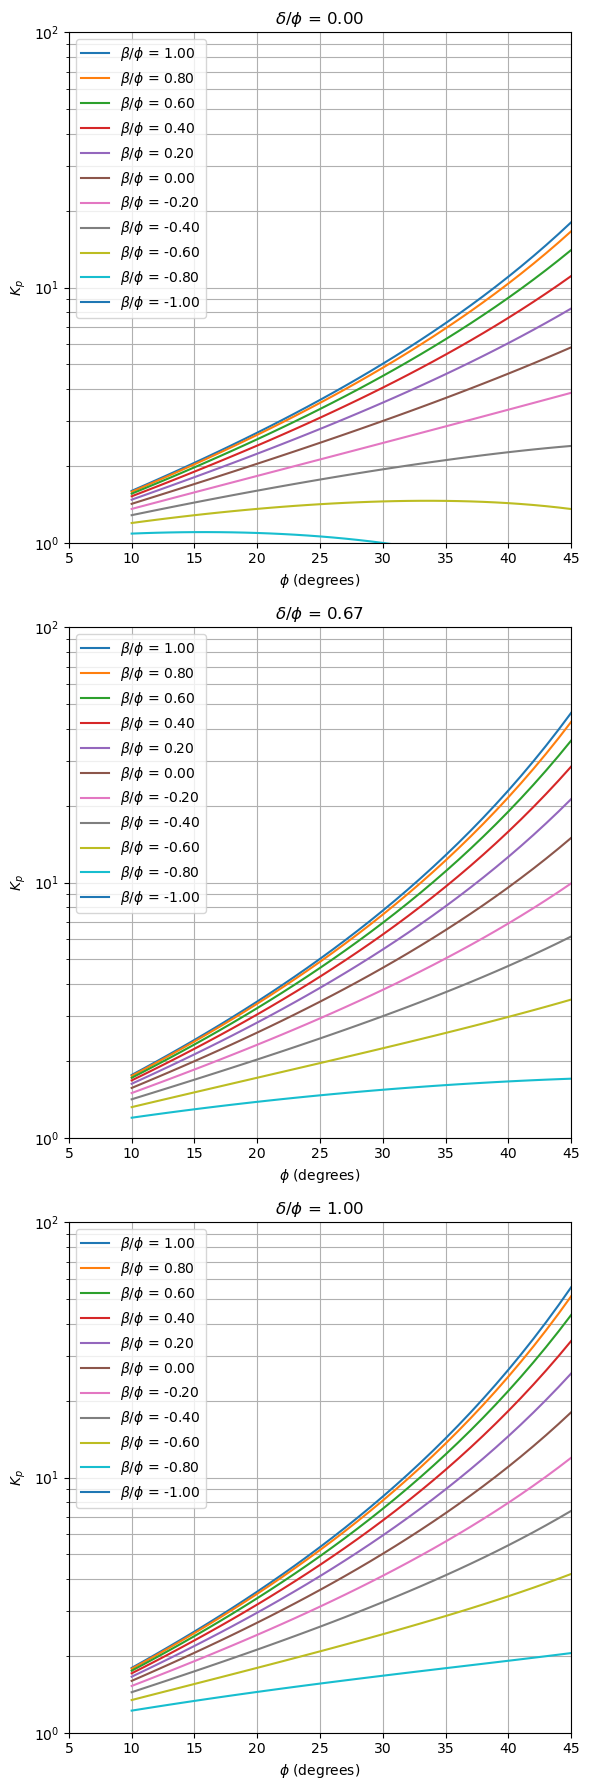

In [5]:
# Inclined Surface

# Inputs
friction = np.arange(10, 46, 1)
delta_ratio = np.array([0, 2/3, 1])
beta_ratio = np.arange(1, -1.2, -0.2)

# Computations
Kp = [[[ pyec7.earth_pressures(friction=phi, cohesion=0, delta=d_phi*phi, beta=b_phi*phi, active=False)[3]
    for b_phi in beta_ratio] for phi in friction] for d_phi in delta_ratio] 

# Plotting
fig,axes = plt.subplots(3,1,figsize=(6, 18))
for i in range(3):
    axes[i].semilogy(friction, Kp[i])
    axes[i].set_xlabel(r'$\phi$ (degrees)')
    axes[i].set_ylabel(r'$K_p$')
    axes[i].set_title(r'$\delta/\phi$ = '+'{:.2f}'.format(delta_ratio[i]))
    axes[i].legend([r'$\beta/\phi$ = ' + '{:.2f}'.format(b_phi) for b_phi in beta_ratio])
    axes[i].set_xlim(5, 45)
    axes[i].set_ylim(1,100)
    axes[i].grid(which='both')
fig.tight_layout()

## Example

In [6]:
Ka = pyec7.earth_pressures(friction=30, cohesion=0, delta=20, beta=18, active=True)
print("Ka = ",Ka)

Kp = pyec7.earth_pressures(friction=30, cohesion=0, delta=20, beta=18, active=False)
print("Kp = ",Kp)

Ka =  (0.4101183362554199, 0.3709555199954168, 1.0217050120588729, 0.3709555199954168)
Kp =  (7.687854607057989, 6.953729817225818, 11.583703973058027, 6.953729817225818)
